# About Data

**home_team**: The name of the home team

**away_team**: The name of the away team

**home_team_continent**: The continent of the home team

**away_team_continent**: The continent of the away team.

**home_team_fifa_rank**: The FIFA rank of the home team at the time of the match.

**away_team_fifa_rank**: The FIFA rank of the away team at the time of the match.

**home_team_total_fifa_points**: The total number of FIFA points of the home team at the time of the match.

**away_team_total_fifa_points**:ThetotalnumberofFIFApointsoftheawayteamatthe time of the match.

**home_team_score**: Full-time home team score including extra time, not including penalty-shootouts.

**away_team_score**: Full-time away team score including extra time, not including penalty-shootouts.

**tournament**: The name of the tournament.

**city**: The name of the city/town/administrative unit where the match was played. o country: The name of the country where the match was played.

**neutral_location**: TRUE/FALSE column indicating whether the match was played at a neutral venue.

**shoot_out**: TRUE/False column indicating whether the match included a penalty shootout.

**home_team_result**: Match result of the home team, including penalty-shootouts.

**home_team_goalkeeper_score**: FIFA game score of the highest ranked goalkeeper of
the home team.

**away_team_goalkeeper_score**: FIFA game score of highest ranked goalkeeper of the away team.

**home_team_mean_defense_score**: Average FIFA game score of the 4 highest ranked defensive players of the home team.

**home_team_mean_offense_score**: Average FIFA game score of the 4 highest ranked midfield players of the home team.

**home_team_mean_midfield_score**: Average FIFA game score of the 3 highest ranked attacking players of the home team, including wing players.

**away_team_mean_defense_score**: Average FIFA game score of the 4 highest ranked defensive players of the away team.

**away_team_mean_offense_score**: Average FIFA game score of the 4 highest ranked midfield players of the away team.

**away_team_mean_midfield_score**: Average FIFA game score of the 3 highest ranked attacking players of the away team, including wing players.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
df = pd.read_csv('international_matches.csv')

In [3]:
df.head(50)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## 
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [5]:
## check isnull
df.isnull().sum()


date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
## check duplicated
df.duplicated().sum()


0

In [7]:
# Categorical features
objects = [f for f in df.columns if df.dtypes[f] == 'object']
print('Non-numeric features: ', objects)

# Categorical features in objects
i = 1
for obj in objects:
    print(f'{i}. {obj} \t {len(df[obj].unique())} unique values, {df[obj].unique()}')
    i += 1

Non-numeric features:  ['date', 'home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'shoot_out', 'home_team_result']
1. date 	 5550 unique values, ['1993-08-08' '1993-08-09' '1993-08-11' ... '2022-06-12' '2022-06-13'
 '2022-06-14']
2. home_team 	 211 unique values, ['Bolivia' 'Brazil' 'Ecuador' 'Guinea' 'Paraguay' 'Peru' 'Zimbabwe'
 'Faroe Islands' 'Sweden' 'Australia' 'Colombia' 'Congo' 'Uruguay'
 'Argentina' 'Austria' 'Denmark' 'Iceland' 'Estonia' 'Eswatini' 'Albania'
 'Bulgaria' 'England' 'Finland' 'Hungary' 'Republic of Ireland'
 'Northern Ireland' 'Norway' 'Scotland' 'Spain' 'Venezuela' 'Morocco'
 'Saudi Arabia' 'Mexico' 'Romania' 'San Marino' 'Tunisia' 'Korea Republic'
 'Nigeria' 'Zambia' 'Japan' 'Cyprus' 'Belgium' 'Algeria' 'Cameroon'
 'Luxembourg' 'France' 'Germany' 'Italy' 'Netherlands' 'Poland' 'Portugal'
 'USA' 'Wales' 'Korea DPR' 'IR Iran' 'Iraq' 'Burundi' 'Liechtenstein'
 'United Arab Emirates' 'Israel' 'Turkey' 'Egypt' 

In [8]:
# Numerical features
numerics = [f for f in df.columns if df.dtypes[f] != 'object']
print('Numeric features: ', numerics)

# Numerical features in numerics
i = 1
for num in numerics:
    print(f'{i}. {num} \t {len(df[num].unique())} unique values')
    i += 1

Numeric features:  ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'neutral_location', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
1. home_team_fifa_rank 	 211 unique values
2. away_team_fifa_rank 	 211 unique values
3. home_team_total_fifa_points 	 1686 unique values
4. away_team_total_fifa_points 	 1679 unique values
5. home_team_score 	 21 unique values
6. away_team_score 	 18 unique values
7. neutral_location 	 2 unique values
8. home_team_goalkeeper_score 	 51 unique values
9. away_team_goalkeeper_score 	 51 unique values
10. home_team_mean_defense_score 	 128 unique values
11. home_team_mean_offense_score 	 104 unique values
12. home_team_mean_midfield_score 	 135 unique value

# Pre-processing

In [9]:
### Top 10 teams by FIFA ranking (by date.now())
fifa_rank = df[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']].rename(columns={"home_team":"team", "home_team_fifa_rank":"rank"})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']].rename(columns={"away_team":"team", "away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home, away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
last_rank = fifa_rank
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank', ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


In [10]:
### Top 10 teams with highest percentage at home and away
### create winning percentage at home and away
#def home_percentage(team):
    #score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    #return round(score)
#def away_percentage(team):
    #score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    #return round(score)

In [11]:
### Create new features home__win_percentage/away_win_percentage/draw_percentage
def home__win_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_win_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def draw_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Draw")]) / len(df[df['home_team'] == team]) * 100
    return round(score)

In [12]:
df['home__team_Win_Per'] = np.vectorize(home__win_percentage)(df['home_team'])
df['away__team_Lose_Per'] = np.vectorize(home_lose_percentage)(df['home_team'])
df['home__team_Draw_Per'] = np.vectorize(draw_percentage)(df['home_team'])

In [13]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home__team_Win_Per,home__team_Lose_Per,home__team_Draw_Per
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,29,31
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,9,13
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,20,23
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,18,22
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,22,25


In [14]:
### list down top 10 teams with highest winning percentage
### winning percentage = (Home + away) /2
#df['Home_win_Per'] = np.vectorize(home_percentage)(df['home_team'])
#df['Away_win_Per'] = np.vectorize(away_percentage)(df['away_team'])
#df['Draw_Per'] = np.vectorize(draw_percentage)(df['home_team'])
#fifa_rank_top10['Average_win_Per'] = round((fifa_rank_top10['Home_win_Per'] + fifa_rank_top10['Away_win_Per']) / 2)
#fifa_rank_win = fifa_rank_top10.sort_values('Average_win_Per', ascending = False)

In [15]:
df.tail(100)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home__team_Win_Per,home__team_Lose_Per,home__team_Draw_Per
23821,2022-06-09,Saudi Arabia,Venezuela,Asia,South America,49,58,1444,1398,0,...,73.0,72.8,67.7,72.8,72.8,76.3,77.8,60,20,19
23822,2022-06-10,USA,Grenada,North America,North America,15,170,1633,968,5,...,NaN,75.8,77.7,75.8,NaN,NaN,NaN,62,20,18
23823,2022-06-10,St. Vincent and the Grenadines,Trinidad and Tobago,North America,South America,175,103,960,1203,0,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,54,26,20
23824,2022-06-10,Bahamas,Nicaragua,North America,North America,201,144,858,1062,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,43,24
23825,2022-06-10,Dominican Republic,Guatemala,North America,North America,155,118,1029,1147,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,31,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,53,27
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,9,74,16
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,74.0,75.5,76.7,78.2,75.5,76.0,78.2,59,23,18
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,NaN,75.2,75.0,77.5,70.8,72.3,74.0,55,22,22


In [16]:
### List down top 10 teams with highest offense_score
fifa_offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = fifa_offense[['date', 'home_team', 'home_team_mean_offense_score']].rename(columns={"home_team":"team", "home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date', 'away_team', 'away_team_mean_offense_score']].rename(columns={"away_team":"team", "away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home, away])
fifa_offense = fifa_offense.sort_values(['date', 'team'],ascending=[False, True])
last_offense = fifa_offense
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score', ascending=False)[0:10].reset_index()
fifa_offense_top10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


In [17]:
### top 10 with highest midfield_score
fifa_midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = fifa_midfield[['date', 'home_team', 'home_team_mean_midfield_score']].rename(columns={"home_team":"team", "home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date', 'away_team', 'away_team_mean_midfield_score']].rename(columns={"away_team":"team", "away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
last_midfield = fifa_midfield
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


In [18]:
### Top 10 teams defending 

In [19]:
fifa_defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = fifa_defense[['date', 'home_team', 'home_team_mean_defense_score']].rename(columns={"home_team":"team", "home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date', 'away_team', 'away_team_mean_defense_score']].rename(columns={"away_team":"team", "away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home, away])
fifa_defense = fifa_defense.sort_values(['date', 'team'],ascending=[False, True])
last_defense = fifa_defense 
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score', ascending = False)[0:10].reset_index()
fifa_defense_top10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


### do home teams have advantage?

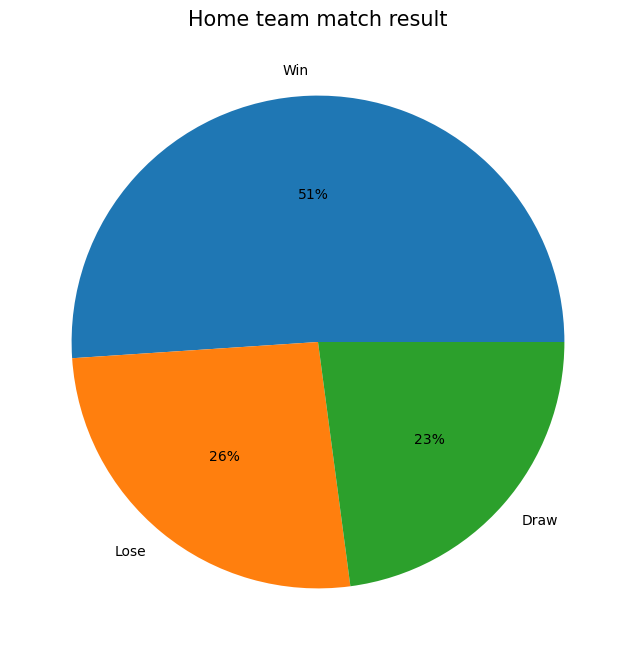

In [20]:

home_team_advantage = df[df['neutral_location'] == False]['home_team_result'].value_counts(normalize = True)

# Plot
fig, axes = plt.subplots(1, 1, figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()


### Comments
- result avobe tells us the advantages of home teams, with 51% winning and 26% draw

#### Missing and Drop unnecessary features

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


#### features with missing values
home_team_goalkeeper_score       15542

away_team_goalkeeper_score       15826

home_team_mean_defense_score     16134

home_team_mean_offense_score     15411

home_team_mean_midfield_score    15759

away_team_mean_defense_score     16357

away_team_mean_offense_score     15609

away_team_mean_midfield_score    15942

### transpose table above indicates
- Max value: around 95
- Mean value: around 75
- third quantile: around 75 and 80
- therefore, mean value is used to replace missing value

In [22]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [23]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
home__team_Win_Per                  0
home__team_L

In [24]:
### the rest of missing value will be replaced by min value 50
df.fillna(50,inplace=True)

In [25]:
df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
home__team_Win_Per               0
home__team_Lose_Per              0
home__team_Draw_Per              0
dtype: int64

In [26]:
df.shape

(23921, 28)

#### Mapping numeric values for home_team_result to find the correlation

In [27]:
# Mapping numeric values for home_team_result to find the correleations
df['home_team_result'] = df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

In [28]:
df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home__team_Win_Per               0.158583
home_team_score                  0.124465
home__team_Draw_Per              0.118065
home_team_mean_offense_score     0.108425
home_team_mean_midfield_score    0.100829
home_team_mean_defense_score     0.098593
home_team_goalkeeper_score       0.083152
away_team_fifa_rank              0.079718
home_team_total_fifa_points      0.016748
away_team_total_fifa_points     -0.037556
neutral_location                -0.064127
away_team_mean_offense_score    -0.077500
away_team_mean_defense_score    -0.083233
away_team_mean_midfield_score   -0.083466
away_team_goalkeeper_score      -0.084569
home_team_fifa_rank             -0.131071
home__team_Lose_Per             -0.203283
away_team_score                 -0.463646
Name: home_team_result, dtype: float64

### We should exclude unnecessary features

    


- there was a positive correlation between home -team metrics and target variable (home team result) 
- conversely, away teams metrics have negative correlation

### there is no or very low correlation 
- home_team_total_fifa_points
- away_team_total_fifa_points
- neutral_location

In [29]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'home__team_Win_Per', 'home__team_Lose_Per', 'home__team_Draw_Per'],
      dtype='object')

In [30]:
categorical_vars = ['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank','tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result']
input_categorical_vars = ['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank','tournament', 'city', 'country',
       'neutral_location', 'shoot_out']
continuous_vars = ['home_team_total_fifa_points',
                   'away_team_total_fifa_points',
                   'home_team_score', 'away_team_score',
                   'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
                   'home_team_mean_defense_score', 'home_team_mean_offense_score',
                   'home_team_mean_midfield_score', 'away_team_mean_defense_score',
                   'away_team_mean_offense_score', 'away_team_mean_midfield_score',
                   'home_team_Win_Per',
                   'home_team_Lose_Per',
                   'home_team_Draw_Per'
                  ]

In [31]:
# Categorical - Categorical
from scipy.stats import chi2_contingency, chi2

#Chi-square Test: H0 - Independent
chi2_test_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
alpha = 0.05
#Chi-square Test: H0 - Independent
chi2_test_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        table = pd.crosstab(df[categorical_vars[i]], df[categorical_vars[j]])
        stat, p, dof, expected = chi2_contingency(table)
        #print('\n*** significance = %.3f, p_value = %.3f' %(alpha,p))
        if p < alpha:
            #print(categorical_var[i],'&',categorical_var[j],'==> Dependent (Reject H0)')
            chi2_test_df.loc[categorical_vars[i], categorical_vars[j]] = 'Dependent'
        else:
            #print(categorical_var[i],'&',categorical_var[j],'==> Independent (Fail to Reject H0)')
            chi2_test_df.loc[categorical_vars[i], categorical_vars[j]] = 'Independent'
chi2_test_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,tournament,city,country,neutral_location,shoot_out,home_team_result
date,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
home_team,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
away_team,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
home_team_continent,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
away_team_continent,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent,Dependent
home_team_fifa_rank,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent,Independent,Dependent
away_team_fifa_rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Independent,Dependent
tournament,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent,Dependent,Dependent
city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Independent,Dependent
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dependent,Dependent,Dependent


In [32]:
chi2_test_df['home_team_result']

date                   Dependent
home_team              Dependent
away_team              Dependent
home_team_continent    Dependent
away_team_continent    Dependent
home_team_fifa_rank    Dependent
away_team_fifa_rank    Dependent
tournament             Dependent
city                   Dependent
country                Dependent
neutral_location       Dependent
shoot_out              Dependent
home_team_result             NaN
Name: home_team_result, dtype: object

### We can exclude a few dependent features from the datasets.
Drop: home_team_continent/away_team_continent/tournament/city/country/neutral_location

### ANOVA

KeyError: "['home_team_Win_Per'] not in index"

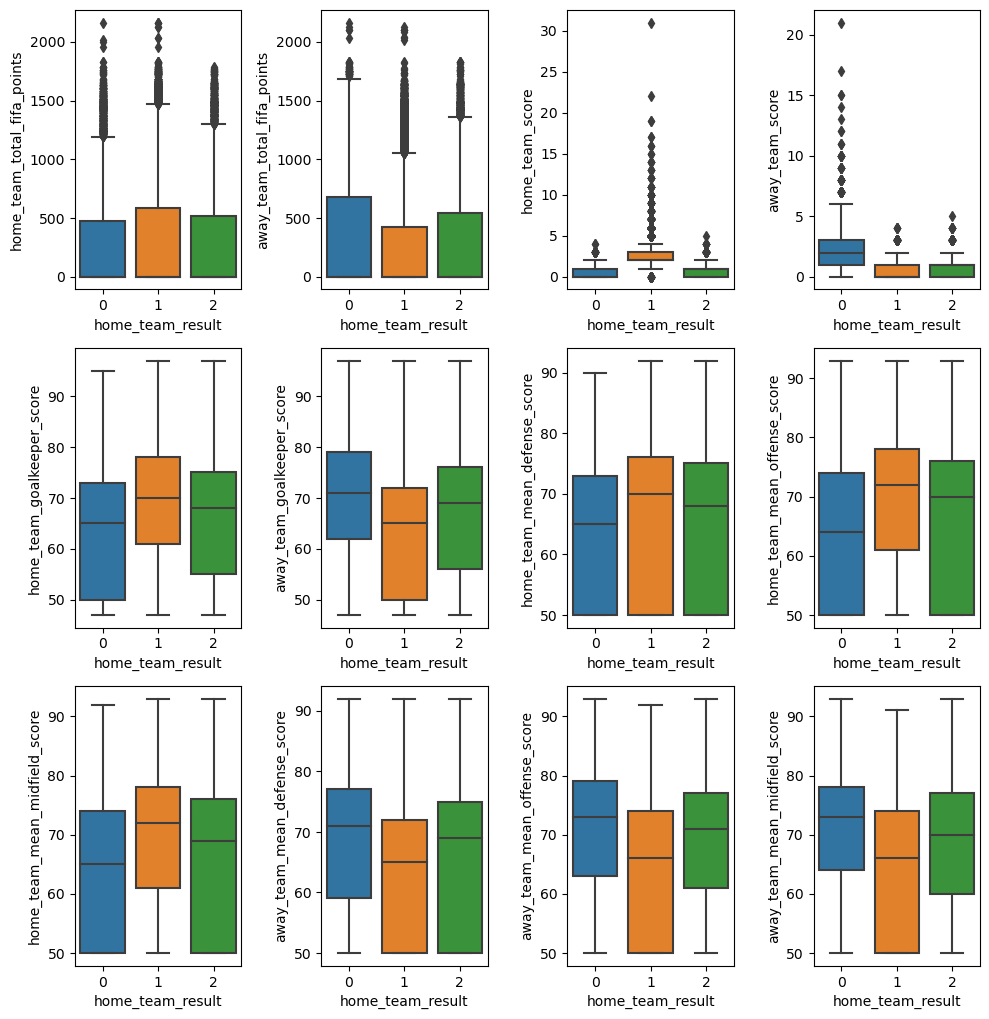

In [33]:
# Continuous - Categorical
import statsmodels.api as sm
from statsmodels.formula.api import ols
depend = []
i = 1
plt.figure(figsize=(10, 20), tight_layout=True)
for col in continuous_vars:
    df_temp = df[[col, "home_team_result"]]
    plt.subplot(6, 4, i)
    sns.boxplot(data=df_temp, x="home_team_result", y=col)
    i += 1
    df_temp.columns = ['cont_data', 'cate_data']
    bieuthuc = 'cont_data ~ C(cate_data)'
    model = ols(bieuthuc, data=df_temp).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    if anova_table.values[0, 3] < alpha:
        depend.append(col)
print('From the Anova table, Alpha: 0.05, continuous features have a dependent relationship with output variable:',
      "home_team_result")
print(depend)
plt.show()

### Features: 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score'
--- we will exclude above features

<AxesSubplot:xlabel='home_team_total_fifa_points', ylabel='Density'>

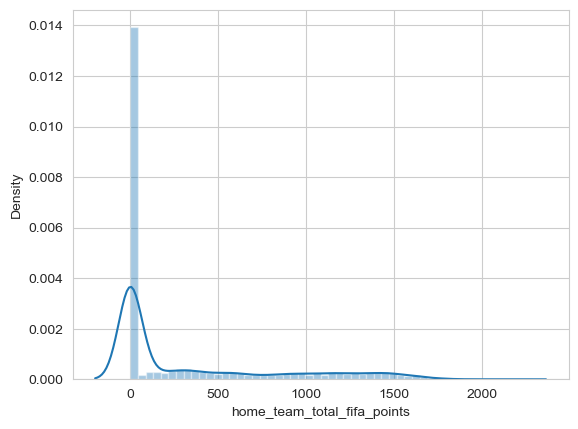

In [34]:
sns.set_style("whitegrid")
sns.distplot(df['home_team_total_fifa_points'])
## result shows the vast majority of home teams is Zero

<AxesSubplot:xlabel='away_team_total_fifa_points', ylabel='Density'>

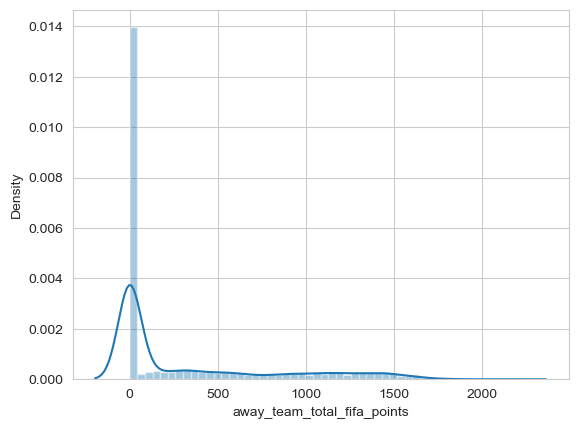

In [35]:
sns.set_style("whitegrid")
sns.distplot(df['away_team_total_fifa_points'])
## ## result shows the vast majority of away teams is Zero

In [36]:
### therefore, above features will be eliminated
final_df = df.drop(['date', 'home_team_continent', 'away_team_continent', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out'],axis=1)

In [51]:
final_df.columns

Index(['Team1', 'Team2', 'Team1_FIFA_RANK', 'Team2_FIFA_RANK', 'Team1_Result',
       'Team1_Goalkeeper_Score', 'Team2_Goalkeeper_Score', 'Team1_Defense',
       'Team1_Offense', 'Team1_Midfield', 'Team2_Defense', 'Team2_Offense',
       'Team2_Midfield', 'home__team_Win_Per', 'home__team_Lose_Per',
       'home__team_Draw_Per'],
      dtype='object')

In [59]:
### Rename Features
final_df.rename(columns={"home_team":"Team1", "away_team":"Team2", "home_team_fifa_rank":"Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield",
                        'Team1_Win_percentage': 'Team1_0_Win',
                         'Team1_Lose_percentage':'Team1_1_Lose',
                         'Team1_Draw_percentage':'Team1_2_Draw'}, inplace=True)

<AxesSubplot:>

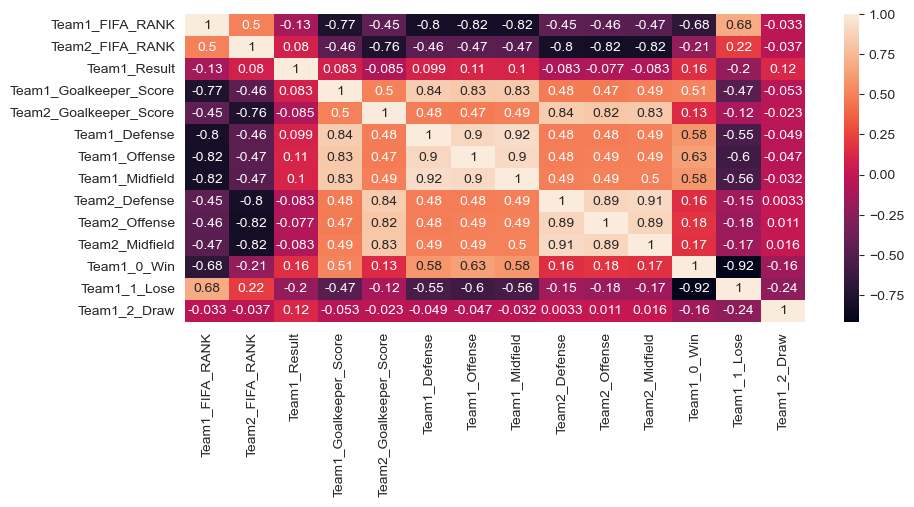

In [60]:
plt.figure(figsize=(10, 4))
sns.heatmap(final_df.corr(), annot=True)

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   23921 non-null  object 
 1   Team2                   23921 non-null  object 
 2   Team1_FIFA_RANK         23921 non-null  int64  
 3   Team2_FIFA_RANK         23921 non-null  int64  
 4   Team1_Result            23921 non-null  int64  
 5   Team1_Goalkeeper_Score  23921 non-null  float64
 6   Team2_Goalkeeper_Score  23921 non-null  float64
 7   Team1_Defense           23921 non-null  float64
 8   Team1_Offense           23921 non-null  float64
 9   Team1_Midfield          23921 non-null  float64
 10  Team2_Defense           23921 non-null  float64
 11  Team2_Offense           23921 non-null  float64
 12  Team2_Midfield          23921 non-null  float64
 13  Team1_0_Win             23921 non-null  int64  
 14  Team1_1_Lose            23921 non-null

In [62]:
final_df

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,Team1_0_Win,Team1_1_Lose,Team1_2_Draw
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,40,29,31
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,78,9,13
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,57,20,23
3,Guinea,Sierra Leone,65,86,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,59,18,22
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,53,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,Moldova,Andorra,180,153,1,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,20,53,27
23917,Liechtenstein,Latvia,192,135,0,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,9,74,16
23918,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,59,23,18
23919,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,55,22,22


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(final_df)
profile

In [63]:
### Save data for next tasks
final_df.to_csv("data/final_df.csv", index = False)